In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

## 1) 載入資料集

In [3]:
iris = load_iris()
df_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
df_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## 2) 切割訓練集與測試集

In [4]:
from sklearn.model_selection import train_test_split
X = df_data.drop(labels=['Species'],axis=1).values # 移除Species並取得剩下欄位資料
y = df_data['Species'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

train shape: (105, 4)
test shape: (45, 4)


## 建立 Logistic regression 模型
邏輯迴歸是由線性回歸變化而來的，屬判別模型適合解決二元分類問題。

Parameters:
- penalty: 正規化l1/l2，防止模型過度擬合。
- C: 數值越大對 weight 的控制力越弱，預設為1。
- n_init: 預設為10次隨機初始化，選擇效果最好的一種來作為模型。
- solver: 優化器的選擇。newton-cg,lbfgs,liblinear,sag,saga。預設為liblinear。
- multi_class: 選擇分類方式，ovr就是one-vs-rest(OvR)，而multinomial就是many-vs-many(MvM)。預設為 auto，故模型訓練中會取一個最好的結果。
- max_iter: 迭代次數，預設為100代。
- class_weight: 若遇資料不平衡問題可以設定balance，預設=None。
- random_state: 亂數種子僅在solver=sag/liblinear時有用。

Attributes:
- coef_: 取得斜率。
- intercept_: 取得截距。

Methods:
- fit: 放入X、y進行模型擬合。
- predict: 預測並回傳預測類別。
- predict_proba: 預測每個類別的機率值。
- score: 預測成功的比例。

In [11]:
from sklearn.linear_model import LogisticRegression

# 建立Logistic模型
logisticModel = LogisticRegression(multi_class='auto', solver='newton-cg',random_state=0)
# 使用訓練資料訓練模型
logisticModel.fit(X_train, y_train)
# 使用訓練資料預測分類
predicted = logisticModel.predict(X_train)

## 使用Score評估模型

In [12]:
# 預測成功的比例
print('訓練集: ',logisticModel.score(X_train,y_train))
print('測試集: ',logisticModel.score(X_test,y_test))

訓練集:  0.9714285714285714
測試集:  0.9333333333333333


## 真實分類

In [13]:
# 建立測試集的 DataFrme
df_test=pd.DataFrame(X_test, columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
df_test['Species'] = y_test
pred = logisticModel.predict(X_test)
df_test['Predict'] = pred

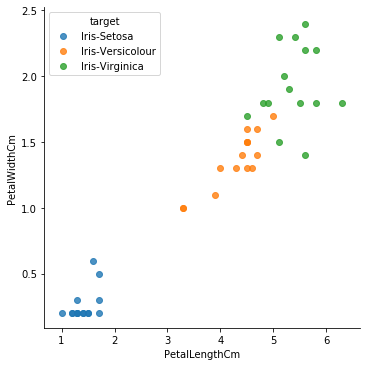

In [14]:
sns.lmplot(x="PetalLengthCm", y="PetalWidthCm", hue='Species', data=df_test, fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])
plt.show()

## Logistic regression (訓練集)預測結果

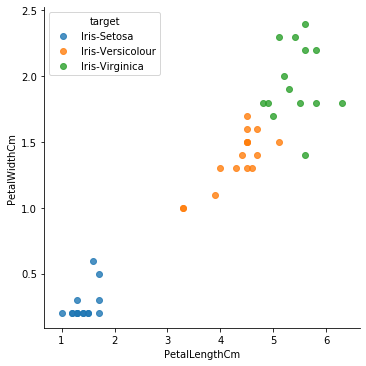

In [10]:
sns.lmplot(x="PetalLengthCm", y="PetalWidthCm", data=df_test, hue="Predict", fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])
plt.show()

## [補充] Limitation of Logistic Regression
Logistic 其實有很大的限制，如下圖範例在線性不可分的時候無法有效預測。我們可以發現無法一刀可以將這四筆資料分成兩個類別。

![](https://i.imgur.com/1PHn2Xj.png)

因為在剛剛的計算方法 Logistic Regression 在兩個類別中僅會切出一條直線。以上例來看不管怎麼分割，始終無法將資料分離出來。

![](https://i.imgur.com/tOckkeI.png)

> from 台大李宏毅教授機器學習課程

In [15]:
from sklearn.linear_model import LogisticRegression

X=np.array([[0,0],[0,1],[1,0],[1,1]])
y=[1,0,0,1]

# 建立Logistic模型
logisticModel = LogisticRegression(random_state=0)
# 使用訓練資料訓練模型
logisticModel.fit(X, y)
# 使用訓練資料預測分類
logisticModel.predict(X)

array([0, 0, 0, 0])

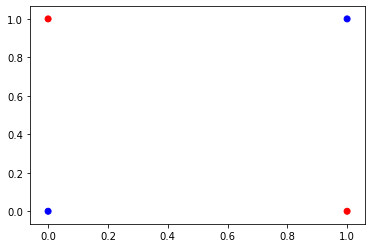

In [16]:
color = "rb"
color = [color[y[i]] for i in range(len(y))]
plt.scatter(X[:,0],X[:,1],c=color)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in double_scalars


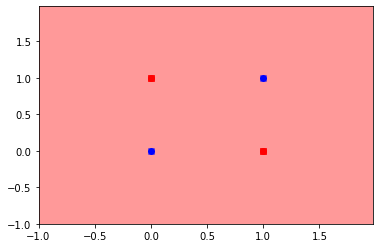

In [18]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

# 決策邊界函式
def plot_decision_regions(X, y, classifier, test_idx = None, resolution=0.02):
	# setup marker generator and color map
	markers = ('s','x','o','^','v')
	colors = ('red','blue','lightgreen','gray','cyan')
	cmap = ListedColormap(colors[:len(np.unique(y))])

	# plot the decision surface
	x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
	x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1

	xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
							np.arange(x2_min,x2_max,resolution))

	Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)

	Z = Z.reshape(xx1.shape)

	plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
	plt.xlim(xx1.min(),xx1.max())
	plt.ylim(xx2.min(),xx2.max())

	for idx, cl in enumerate(np.unique(y)):
		plt.scatter(x=X[y==cl,0], y=X[y==cl,1],
			alpha=0.8, c=[cmap(idx)], marker=markers[idx],label=cl)
	if test_idx:
		X_test, y_test = X[test_idx,:], y[test_idx]
		plt.scatter(X_test[:, 0], X_test[:,1], c='',
			alpha=1.0, linewidth=1, marker='o',
			s=55, label='test set')

# 繪製決策邊界
plt.figure()
plot_decision_regions(X,y,logisticModel)
# Plot also the training points
colors = "rb"
for i, color in zip(logisticModel.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired)

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = logisticModel.coef_
intercept = logisticModel.intercept_

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
              ls="--", color=color)

plot_hyperplane(0, 'r')

plt.show()